In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

대부분의 데이터에 누락값이 존재하기 때문에 깔끔한 데이터를 위해 누락값을 처리하는 것은 매우 중요하다.
누락값은 NaN으로 표기되고, 누락값을 사용하려면 numpy 라이브러리가 필요하다.

In [3]:
# 누락값을 사용하기 위해 numpy에서 누락값을 import한다.
from numpy import NaN, NAN, nan

In [4]:
# 누락값은 0, ''과는 다른 개념으로 데이터 자체가 없다는 것을 의미한다. => NULL => '같다'라는 개념도 없다.
print(NaN == True)
print(NaN == False)
print(NaN == 0)
print(NaN == '')

False
False
False
False


In [6]:
# 누락값은 값 자체가 없기 때문에 자기 자신과 비교해도 False가 출력된다.
print(NaN == NaN)
print(NAN == NAN)
print(nan == nan)

False
False
False


In [10]:
# pandas는 누락값을 확인하는 isnull(), isna() 함수가 있고 누락값이면 True, 누락값이 아니면 False를 리턴한다.
print(pd.isnull(NaN))
print(pd.isna(NaN))
print(pd.isna(0))
print(pd.isna(''))

True
True
False
False


In [11]:
# isnull(), isna() 함수와는 반대로 누락값이 아닌지 확인하는 notnull(), notna() 함수가 있고 누락값이 아니면 True, 누락값이면 False를 리턴한다.
print(pd.notnull(NaN))
print(pd.notna(NaN))
print(pd.notna(0))
print(pd.notna(''))

False
False
True
True


누락값 개수

In [13]:
# Cases_* => 국가별 발병자 수, Deaths_* => 국가별 사망자수
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0            NaN            10030.0   
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0              NaN            NaN                 NaN          NaN   
1              NaN            NaN                 NaN          NaN   
2              NaN            NaN                 NaN          NaN   
3              NaN            NaN                 NaN          NaN   
4              NaN            NaN                 NaN          NaN   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
0           NaN         1786.0             NaN              2977.0   
1           NaN         1781.0             NaN              2943.0   
2           NaN         1767.0          3496.0              2915.0   
3           NaN            NaN          3496.0                 NaN   
4           NaN         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
0               NaN             NaN                  NaN           NaN   
1               NaN             NaN                  NaN           NaN   
2               NaN             NaN                  NaN           NaN   
3               NaN             NaN                  NaN           NaN   
4               NaN             NaN                  NaN           NaN   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
117          NaN  
118          NaN  
119          NaN  
120          NaN  
121          NaN  

[122 rows x 18 columns]

In [21]:
# numpy의 count_nonzero() 함수는 0이 아닌 데이터의 개수를 센다. 공백이 입력되면 오동작한다.
print(np.count_nonzero([False, True, 0, 1, '']))
print(np.count_nonzero(ebola.isna())) # ebola 데이터프레임의 전체 누락값 개수
print(np.count_nonzero(ebola['Cases_Guinea'].isnull())) # ebola 데이터프레임의 Cases_Guinea열의 누락값 개수
print(np.count_nonzero(ebola.get('Cases_Liberia').isnull())) 
print(np.count_nonzero(ebola.Cases_SierraLeone.isnull())) 

4
1214
29
39
35


In [17]:
# count() 함수는 누락 값이 아닌 데이터의 개수를 센다.
print(ebola.count())

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64


In [29]:
print(ebola.shape)
print('ebola 데이터프레임은 {}행 {}열입니다.'.format(ebola.shape[0], ebola.shape[1]))
# 전체 데이터에서 누락값이 아닌 데이터의 개수를 빼면 누락값의 개수를 알 수 있다.
num_row = ebola.shape[0]
num_missing = num_row - ebola.count()
print(num_missing)

(122, 18)
ebola 데이터프레임은 122행 18열입니다.
Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


In [33]:
# values_counts() 함수는 시리즈에 저장된 데이터의 빈도수를 얻어온다.
print(type(ebola.Cases_Guinea))
print(ebola.Cases_Guinea.value_counts())
# values_counts() 함수는 기본적으로 누락값을 무시하고 데이터의 빈도수를 얻어온다.
# dropna=True이 기본값으로 설정되어 있어서, 누락값을 포함한 데이터의 빈도수를 얻어오려면 dropna=False로 지정한다.
print(ebola.Cases_Guinea.value_counts(dropna=False))

<class 'pandas.core.series.Series'>
86.0      3
112.0     2
390.0     2
495.0     2
2597.0    1
         ..
235.0     1
231.0     1
226.0     1
224.0     1
2776.0    1
Name: Cases_Guinea, Length: 88, dtype: int64
NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
235.0      1
231.0      1
226.0      1
224.0      1
2776.0     1
Name: Cases_Guinea, Length: 89, dtype: int64


In [34]:
! pip install missingno

In [39]:
import missingno as msno
import matplotlib.pyplot as plt

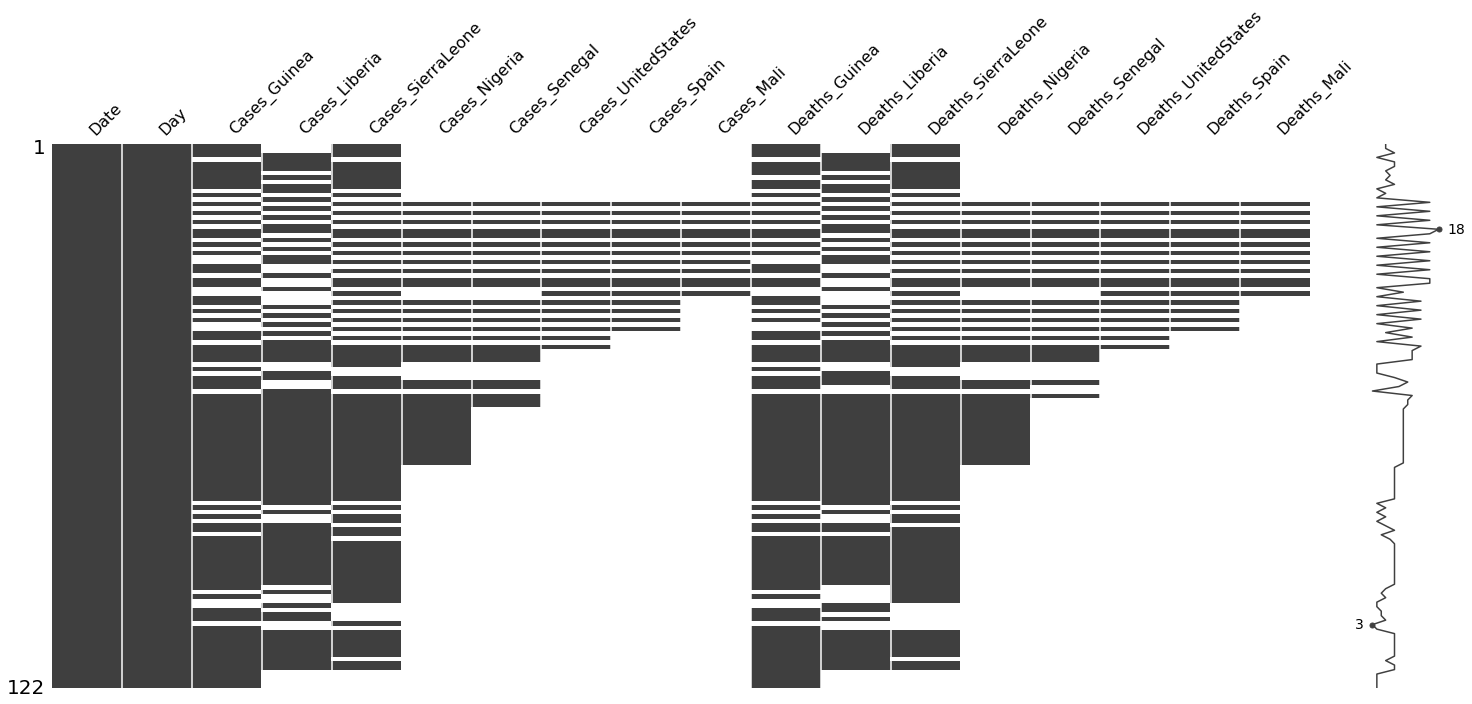

In [40]:
msno.matrix(ebola)
plt.show()

누락값 처리하기

In [49]:
print(ebola.iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0            NaN             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0            NaN             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [ ]:
# fillna() 함수의 인수로 특정 데이터를 지정하면 누락값이 지정한 데이터로 변경된다.

In [51]:
print(ebola.fillna(0).iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            0.0            10030.0
1    1/4/2015  288        2775.0            0.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           0.0         8157.0                0.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0            0.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0            0.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [55]:
# fillna() 함수에 method='ffill' 옵션을 지정하면 누락값이 나타나기 바로 전 값으로 누락값을 변경한다.
print(ebola.fillna(method='ffill').iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2769.0         8157.0             9722.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         8018.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7977.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [56]:
# fillna() 함수에 method='bfill' 옵션을 지정하면 누락값이 나타난 바로 다음 값으로 누락값을 변경한다.
print(ebola.fillna(method='bfill').iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0         8166.0            10030.0
1    1/4/2015  288        2775.0         8166.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2730.0         8157.0             9633.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7977.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7862.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [60]:
# interpolate() 함수는 누락값 양쪽에 있는 데이터를 이용해서 중간값(평균)으로 누락을 변경한다.
print(ebola.interpolate().iloc[:10, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2749.5         8157.0             9677.5
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7997.5             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7919.5             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


누락값 삭제하기

In [64]:
# dropna() 함수는 누락값이 표함된 행을 삭제한다.
ebola_dropna = ebola.dropna()
ebola_dropna

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
19  11/18/2014  241        2047.0         7082.0             6190.0   

    Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
19           20.0            1.0                 4.0          1.0         6.0   

    Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
19         1214.0          2963.0              1267.0             8.0   

    Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
19             0.0                  1.0           0.0          6.0

누락값이 하나라도 있는 행은 계산 결과도 누락값이 된다.

In [65]:
ebola['Cases_Multi'] = ebola.Cases_Guinea + ebola.Cases_Liberia + ebola.Cases_SierraLeone
ebola

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0      1/5/2015  289        2776.0            NaN            10030.0   
1      1/4/2015  288        2775.0            NaN             9780.0   
2      1/3/2015  287        2769.0         8166.0             9722.0   
3      1/2/2015  286           NaN         8157.0                NaN   
4    12/31/2014  284        2730.0         8115.0             9633.0   
..          ...  ...           ...            ...                ...   
117   3/27/2014    5         103.0            8.0                6.0   
118   3/26/2014    4          86.0            NaN                NaN   
119   3/25/2014    3          86.0            NaN                NaN   
120   3/24/2014    2          86.0            NaN                NaN   
121   3/22/2014    0          49.0            NaN                NaN   

     Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
0              NaN            NaN                 NaN          NaN   
1              NaN            NaN                 NaN          NaN   
2              NaN            NaN                 NaN          NaN   
3              NaN            NaN                 NaN          NaN   
4              NaN            NaN                 NaN          NaN   
..             ...            ...                 ...          ...   
117            NaN            NaN                 NaN          NaN   
118            NaN            NaN                 NaN          NaN   
119            NaN            NaN                 NaN          NaN   
120            NaN            NaN                 NaN          NaN   
121            NaN            NaN                 NaN          NaN   

     Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
0           NaN         1786.0             NaN              2977.0   
1           NaN         1781.0             NaN              2943.0   
2           NaN         1767.0          3496.0              2915.0   
3           NaN            NaN          3496.0                 NaN   
4           NaN         1739.0          3471.0              2827.0   
..          ...            ...             ...                 ...   
117         NaN           66.0             6.0                 5.0   
118         NaN           62.0             NaN                 NaN   
119         NaN           60.0             NaN                 NaN   
120         NaN           59.0             NaN                 NaN   
121         NaN           29.0             NaN                 NaN   

     Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
0               NaN             NaN                  NaN           NaN   
1               NaN             NaN                  NaN           NaN   
2               NaN             NaN                  NaN           NaN   
3               NaN             NaN                  NaN           NaN   
4               NaN             NaN                  NaN           NaN   
..              ...             ...                  ...           ...   
117             NaN             NaN                  NaN           NaN   
118             NaN             NaN                  NaN           NaN   
119             NaN             NaN                  NaN           NaN   
120             NaN             NaN                  NaN           NaN   
121             NaN             NaN                  NaN           NaN   

     Deaths_Mali  Cases_Multi  
0            NaN          NaN  
1            NaN          NaN  
2            NaN      20657.0  
3            NaN          NaN  
4            NaN      20478.0  
..           ...          ...  
117          NaN        117.0  
118          NaN          NaN  
119          NaN          NaN  
120          NaN          NaN  
121          NaN          NaN  

[122 rows x 19 columns]

In [68]:
ebola_subset = ebola.loc[:, ['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Multi']]
ebola_subset

Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Multi
0          2776.0            NaN            10030.0          NaN
1          2775.0            NaN             9780.0          NaN
2          2769.0         8166.0             9722.0      20657.0
3             NaN         8157.0                NaN          NaN
4          2730.0         8115.0             9633.0      20478.0
..            ...            ...                ...          ...
117         103.0            8.0                6.0        117.0
118          86.0            NaN                NaN          NaN
119          86.0            NaN                NaN          NaN
120          86.0            NaN                NaN          NaN
121          49.0            NaN                NaN          NaN

[122 rows x 4 columns]

기초 통계를 계산하는 함수는 skipna=True가 기본값으로 사용되기 때문에 누락값을 무시하고 함수가 실행된다.

In [74]:
print(ebola.Cases_Guinea.sum(skipna=True)) # skipna 옵션을 생략하면 True가 기본값으로 사용된다.
print(ebola.Cases_Guinea.sum(skipna=False)) 
print(ebola.Cases_Guinea.mean()) 
print(ebola.Cases_Guinea.max()) 
print(ebola.Cases_Guinea.min()) 
print(ebola.Cases_Guinea.count()) # count는 skipna 옵션을 지원하지 않는다. 

84729.0
nan
911.0645161290323
2776.0
49.0
93
